#Time Series Analysis with LSTM

Data downloaded from: https://yhoo.it/2G694yC

In [0]:
import matplotlib.pyplot as plt
import matplotlib as mplt

import pandas as pd  
import numpy as np  

from keras.models import Sequential  
from keras.layers import Dense  
from keras.layers import LSTM 
from keras.layers import Dropout

from google.colab import files

Using TensorFlow backend.


###Loading Dataset and Visualization

In [0]:
#Upload file from local drive
files.upload()

#Training data in the period from 01/01/2013 to 31/12/2017
data_train = pd.read_csv(r'AAPL_train.csv')

Saving AAPL_train.csv to AAPL_train.csv


In [0]:
#Visualize data imported from the csv file
data_train.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-12-31,72.932854,76.485718,72.714287,76.024284,53.974899,164873100
1,2013-01-02,79.117142,79.285713,77.375717,78.432854,55.684914,140129500
2,2013-01-03,78.268570,78.524284,77.285713,77.442856,54.982059,88241300


Text(0, 0.5, 'Apple opening stock price')

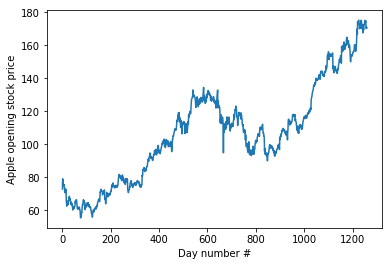

In [0]:
#Plot data training data
plt.plot(data_train['Open'])
plt.xlabel('Day number #')
plt.ylabel('Apple opening stock price')

###Preprocessing

In [0]:
#Normalize features
from sklearn.preprocessing import MinMaxScaler 

data_train_open = np.asarray(data_train['Open'].values).reshape(-1,1) #To be able to use MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))
data_train_open_scaled = scaler.fit_transform(data_train_open)

In [0]:
#Preparing training data features and labels
pred_period = 60; # prediction over the last pred_period days
xtrain = []  
ytrain = []  
for i in range(pred_period, len(data_train_open_scaled)):  
    xtrain.append(data_train_open_scaled[i-pred_period:i, 0])
    ytrain.append(data_train_open_scaled[i, 0])

#Converting xtrain and ytrain to numpy arrays    
xtrain, ytrain = np.array(xtrain), np.array(ytrain)

#Reshaping xtrain to be accepted by LSTM module
xtrain = xtrain.reshape(-1,pred_period,1)

###Building Model

In [0]:
#Building the model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(pred_period, 1)))
#model.add(Dropout(0.2))  
model.add(LSTM(units=50, return_sequences=True))
#model.add(Dropout(0.2))  
model.add(LSTM(units=50, return_sequences=True))
#model.add(Dropout(0.2))  
model.add(LSTM(units=50))
#model.add(Dropout(0.2))  
model.add(Dense(units = 1))  

model.compile(optimizer = 'adam', loss = 'mean_squared_error')  

model.fit(xtrain, ytrain, epochs = 100, batch_size = 64)  

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1200/1200 [==============================] - 12s 10ms/step - loss: 0.0625
Epoch 2/100
1200/1200 [==============================] - 8s 7ms/step - loss: 0.0072
Epoch 3/100
1200/1200 [==============================] - 8s 7ms/step - loss: 0.0022
Epoch 4/100
1200/1200 [==============================] - 8s 7ms/step - loss: 0.0019
Epoch 5/100
1200/1200 [==============================] - 8s 7ms/step - loss: 0.0019
Epoch 6/100
1200/1200 [==============================] - 8s 7ms/step - loss: 0.0019
Epoch 7/100
1200/1200 [==============================] - 8s 7ms/step - loss: 0.0020
Epoch 8/100
1200/1200 [==============================] - 8s 7ms/step - loss: 0.0018
Epoch 9/100
1200/1200 [==============================] - 8s 7ms/step - loss: 0.0016
Epoch 10/100
1200/1200 [==============================] - 8s 7ms/step - loss: 0.0016
Epoch 11/100
1200/1200 [=============

###Predicting and Visualizing Model's Output of Training Set

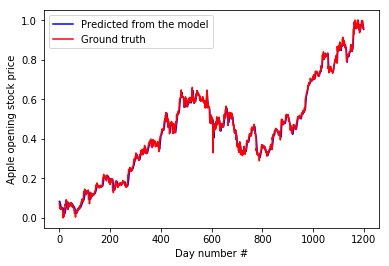

In [0]:
ypred = model.predict(xtrain)

plt.plot(ypred, color='blue', label='Predicted from the model')
plt.plot(ytrain, color='red', label='Ground truth')
plt.xlabel('Day number #')
plt.ylabel('Apple opening stock price')
plt.legend()

###Loading Test Data and Preprocessing

In [0]:
#Testing data in the period from 01/01/2018 to 31/01/2018
files.upload()
data_test = pd.read_csv(r'AAPL_test.csv')

train_length = len(data_train_open_scaled)
data_test_open = np.asarray(data_test['Open'].values).reshape(-1,1) #To be able to use MinMaxScaler
scaler2 = MinMaxScaler(feature_range = (0, 1))
data_test_open1 = np.concatenate((data_train_open[train_length-60:train_length],data_test_open))
data_test_open_scaled = scaler2.fit_transform(data_test_open1)

#Preparing testing data features and labels
xtest = []  
ytest = []  

####################TO BE DONE####################
# Prepare your xtest and ytest arrays
for i in range(pred_period, len(data_test_open_scaled)):  
    xtest.append(data_test_open_scaled[i-pred_period:i, 0])
    ytest.append(data_test_open_scaled[i, 0])


##################################################
#Converting xtest and ytest to numpy arrays    
xtest, ytest = np.array(xtest), np.array(ytest)    
    
#Reshaping xtrain to be accepted by LSTM module
xtest = xtest.reshape(-1,pred_period,1)

Saving AAPL_test.csv to AAPL_test.csv


In [0]:
model.evaluate(xtest, ytest)


20/20 [==============================] - 1s 55ms/step


0.008761202916502953

###Predicting Model Performance over Test Data

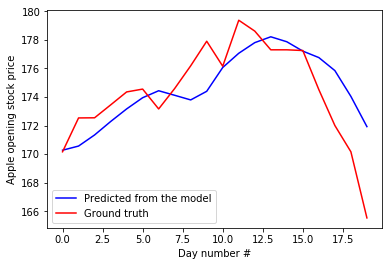

In [0]:
####################TO BE DONE####################
#Predict the the stock value for the test data
#Take any other actions to make sure that your data is relevant


ypred2 = model.predict(xtest)
ypred2 = scaler2.inverse_transform(ypred2)
##################################################
plt.plot(ypred2, color='blue', label='Predicted from the model')
plt.plot(data_test_open, color='red', label='Ground truth')
plt.xlabel('Day number #')
plt.ylabel('Apple opening stock price')
plt.legend()